**IMPORT LIBRARIES**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")
!pip install silence_tensorflow
import silence_tensorflow.auto

  Created wheel for silence-tensorflow: filename=silence_tensorflow-1.1.1-cp36-none-any.whl size=3743 sha256=255f6d6b90eb8a06950f0d26f27570a3a522c0a63221ab21cce27ffdf42ca5c5
  Stored in directory: /root/.cache/pip/wheels/51/0b/35/cf3020764bee61daa81fa249df3a448e3806344a087fc12292
Successfully built silence-tensorflow


**LOAD AND PREPROCESS DATA**

In [2]:
# load data
x_train = pd.read_csv("x_train.csv")
y_train = pd.read_csv("y_train.csv")
x_test = pd.read_csv("x_test.csv")
y_test = pd.read_csv("y_test.csv")
x_valid = pd.read_csv("x_valid.csv")
y_valid = pd.read_csv("y_valid.csv")

# normalize data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
x_valid=sc.fit_transform(x_valid)

# check dimensions
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)
print("x_valid:", x_valid.shape)
print("y_valid:", y_valid.shape)


x_train: (192, 4)
y_train: (192, 1)
x_test: (100, 4)
y_test: (100, 1)
x_valid: (100, 4)
y_valid: (100, 1)


# **TASK 1 - NEURAL NETWORKS**

In [23]:
# model 1 : 4-5-1
model1 = Sequential()
model1.add(Dense(5, input_dim=4, activation = 'relu'))
model1.add(Dense(1))

model1.compile(loss='mse', optimizer ='adam', metrics=['mse'])
history1 = model1.fit(x_train, y_train, epochs=150, batch_size=10, verbose = 0)

In [24]:
# model 2 : 4-10-1
model2 = Sequential()
model2.add(Dense(10, input_dim=4, activation = 'relu'))
model2.add(Dense(1))

model2.compile(loss='mse', optimizer ='adam', metrics=['mse'])
history2 = model2.fit(x_train, y_train, epochs=150, batch_size=10, verbose = 0)

In [25]:
# model 3 : 4-5-10-5-1
model3 = Sequential()
model3.add(Dense(5, input_dim=4, activation = 'relu'))
model3.add(Dense(10, activation = 'relu'))
model3.add(Dense(5, activation = 'relu'))
model3.add(Dense(1))

model3.compile(loss='mse', optimizer ='adam', metrics=['mse'])
history3 = model3.fit(x_train, y_train, epochs=150, batch_size=10, verbose = 0)

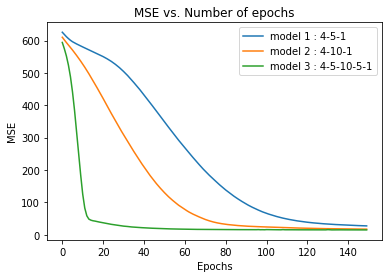

In [ ]:
# compare MSE of 3 models
plt.title("MSE vs. Number of epochs")
plt.plot(history1.history["mse"], label = 'model 1 : 4-5-1')
plt.plot(history2.history["mse"], label = 'model 2 : 4-10-1')
plt.plot(history3.history["mse"], label = 'model 3 : 4-5-10-5-1')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()

The model with 3 hidden layers of sizes 5, 10 and 5 respectively performs the best, i.e. converges to a minimum MSE quickly. Hence when we predict on the test data using this model we get minimum mean square error (mse) for it as follows.

In [27]:
model1.evaluate(x_test, y_test)
model2.evaluate(x_test, y_test)
model3.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 14.9765 - mse: 14.9765


[14.976519584655762, 14.976519584655762]

# **TASK 2 - NEURAL NETWORKS WITH CROSS VALIDATION**

In [ ]:
# initialize kfold
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True)

# merge train and valid data
X = np.concatenate((x_train, x_valid), axis=0)
y = np.concatenate((y_train, y_valid), axis=0)

# store validation MSE for all epochs after each fold
val_mse1 = []

# start with first fold
fold_no = 1

# run loop over all folds
for train, test in kfold.split(X, y):

  # Define the model 
  cross_model1 = Sequential()
  cross_model1.add(Dense(5, input_dim=4, activation = 'relu'))
  cross_model1.add(Dense(1))

  # Compile the model
  cross_model1.compile(loss='mse', optimizer='adam', metrics=['mse'])

  # Track fold
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  cross_history1 = cross_model1.fit(X[train], y[train], batch_size=10, epochs=150, verbose = 0, validation_data=(X[test], y[test]))
  val_mse1.append(cross_history1.history['val_mse'])

  # Increment fold
  fold_no = fold_no + 1

Training for fold 1 ...
Training for fold 2 ...
Training for fold 3 ...
Training for fold 4 ...
Training for fold 5 ...
Training for fold 6 ...
Training for fold 7 ...
Training for fold 8 ...
Training for fold 9 ...
Training for fold 10 ...


In [ ]:
# initialize kfold
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True)

# merge train and valid data
X = np.concatenate((x_train, x_valid), axis=0)
y = np.concatenate((y_train, y_valid), axis=0)

# store validation MSE for all epochs after each fold
val_mse2 = []

# start with first fold
fold_no = 1

# run loop over all folds
for train, test in kfold.split(X, y):

  # Define the model 
  cross_model2 = Sequential()
  cross_model2.add(Dense(10, input_dim=4, activation = 'relu'))
  cross_model2.add(Dense(1))

  # Compile the model
  cross_model2.compile(loss='mse', optimizer='adam', metrics=['mse'])

  # Track fold
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  cross_history2 = cross_model2.fit(X[train], y[train], batch_size=10, epochs=150, verbose = 0, validation_data=(X[test], y[test]))
  val_mse2.append(cross_history2.history['val_mse'])

  # Increment fold
  fold_no = fold_no + 1

Training for fold 1 ...
Training for fold 2 ...
Training for fold 3 ...
Training for fold 4 ...
Training for fold 5 ...
Training for fold 6 ...
Training for fold 7 ...
Training for fold 8 ...
Training for fold 9 ...
Training for fold 10 ...


In [ ]:
# initialize kfold
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True)

# merge train and valid data
X = np.concatenate((x_train, x_valid), axis=0)
y = np.concatenate((y_train, y_valid), axis=0)

# store validation MSE for all epochs after each fold
val_mse3 = []

# start with first fold
fold_no = 1

# run loop over all folds
for train, test in kfold.split(X, y):

  # Define the model
  cross_model3 = Sequential()
  cross_model3.add(Dense(5, input_dim=4, activation = 'relu'))
  cross_model3.add(Dense(10, activation = 'relu'))
  cross_model3.add(Dense(5, activation = 'relu'))
  cross_model3.add(Dense(1))

  # Compile the model
  cross_model3.compile(loss='mse', optimizer='adam', metrics=['mse'])

  # Track model
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  cross_history3 = cross_model3.fit(X[train], y[train], batch_size=10, epochs=150, verbose = 0, validation_data=(X[test], y[test]))
  val_mse3.append(cross_history3.history['val_mse'])

  # Increment fold
  fold_no = fold_no + 1

Training for fold 1 ...
Training for fold 2 ...
Training for fold 3 ...
Training for fold 4 ...
Training for fold 5 ...
Training for fold 6 ...
Training for fold 7 ...
Training for fold 8 ...
Training for fold 9 ...
Training for fold 10 ...


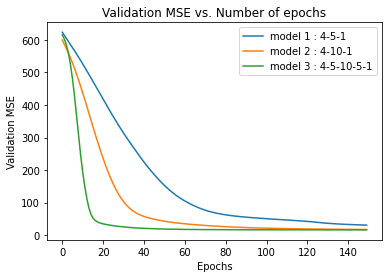

In [ ]:
plt.title("Validation MSE vs. Number of epochs")
plt.plot(np.mean(val_mse1, axis = 0), label = 'model 1 : 4-5-1')
plt.plot(np.mean(val_mse2, axis = 0), label = 'model 2 : 4-10-1')
plt.plot(np.mean(val_mse3, axis = 0), label = 'model 3 : 4-5-10-5-1')
plt.xlabel("Epochs")
plt.ylabel("Validation MSE")
plt.legend()
plt.show()

Again, the model with 3 hidden layers of sizes 5, 10 and 5 respectively performs the best with k-fold cross validation as well, i.e. converges to a minimum validation MSE quickly. Having identified the best model, when we predict on the test data using it, we get lowest mean square error (mse) as follows.

In [ ]:
cross_model1.evaluate(x_test, y_test)
cross_model2.evaluate(x_test, y_test)
cross_model3.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 14.1578 - mse: 14.1578


[14.157781600952148, 14.157781600952148]

# **TASK 3 - REGULARISATION**

In [3]:
# initialize kfold
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True)

# set range of alpha
alpha = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e-0]

# store mse for each value of alpha
mse_alpha1 = []

# run loop over all alphas
for a in alpha:

  mse_per_fold1 = []

  X = np.concatenate((x_train, x_valid), axis=0)
  y = np.concatenate((y_train, y_valid), axis=0)

  fold_no = 1

  print("Regularizer paramter:", a)
  
  for train, test in kfold.split(X, y):

    reg_model1 = Sequential()
    reg_model1.add(Dense(5, input_dim=4, activation = 'relu', kernel_regularizer=keras.regularizers.l2(a)))
    reg_model1.add(Dense(1))

    reg_model1.compile(loss='mse', optimizer='adam', metrics=['mse'])

    reg_history1 = reg_model1.fit(X[train], y[train], batch_size=10, epochs=300, verbose = 0)

    scores = reg_model1.evaluate(X[test], y[test], verbose=0)
    mse_per_fold1.append(scores[1])

    fold_no = fold_no + 1

  mse_alpha1.append(np.mean(mse_per_fold1))

Regularizer paramter: 1e-06
Regularizer paramter: 1e-05
Regularizer paramter: 0.0001
Regularizer paramter: 0.001
Regularizer paramter: 0.01
Regularizer paramter: 0.1
Regularizer paramter: 1.0


In [4]:
# initialize kfold
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True)

# set range of alpha
alpha = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e-0]

# store mse for each value of alpha
mse_alpha2 = []

# run loop over all alphas
for a in alpha:

  mse_per_fold2 = []

  X = np.concatenate((x_train, x_valid), axis=0)
  y = np.concatenate((y_train, y_valid), axis=0)

  fold_no = 1

  print("Regularizer paramter:", a)
  
  for train, test in kfold.split(X, y):

    reg_model2 = Sequential()
    reg_model2.add(Dense(10, input_dim=4, activation = 'relu', kernel_regularizer=keras.regularizers.l2(a)))
    reg_model2.add(Dense(1))

    reg_model2.compile(loss='mse', optimizer='adam', metrics=['mse'])

    reg_history2 = reg_model2.fit(X[train], y[train], batch_size=10, epochs=300, verbose = 0)

    scores = reg_model2.evaluate(X[test], y[test], verbose=0)
    mse_per_fold2.append(scores[1])

    fold_no = fold_no + 1

  mse_alpha2.append(np.mean(mse_per_fold2))

Regularizer paramter: 1e-06
Regularizer paramter: 1e-05
Regularizer paramter: 0.0001
Regularizer paramter: 0.001
Regularizer paramter: 0.01
Regularizer paramter: 0.1
Regularizer paramter: 1.0


In [13]:
# initialize kfold
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True)

# set range of alpha
alpha = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e-0]

# store mse for each value of alpha
mse_alpha3 = []

# run loop over all alphas
for a in alpha:

  mse_per_fold3 = []

  X = np.concatenate((x_train, x_valid), axis=0)
  y = np.concatenate((y_train, y_valid), axis=0)

  fold_no = 1

  print("Regularizer paramter:", a)
  
  for train, test in kfold.split(X, y):

    reg_model3 = Sequential()
    reg_model3.add(Dense(5, input_dim=4, activation = 'relu', kernel_regularizer=keras.regularizers.l2(a)))
    reg_model3.add(Dense(10, activation = 'relu', kernel_regularizer=keras.regularizers.l2(a)))
    reg_model3.add(Dense(5, activation = 'relu', kernel_regularizer=keras.regularizers.l2(a)))
    reg_model3.add(Dense(1))

    reg_model3.compile(loss='mse', optimizer='adam', metrics=['mse'])

    reg_history3 = reg_model3.fit(X[train], y[train], batch_size=10, epochs=300, verbose = 0)

    scores = reg_model3.evaluate(X[test], y[test], verbose=0)
    mse_per_fold3.append(scores[1])
    # print(scores[1])

    fold_no = fold_no + 1

  mse_alpha3.append(np.mean(mse_per_fold3))

Regularizer paramter: 1e-06
Regularizer paramter: 1e-05
Regularizer paramter: 0.0001
Regularizer paramter: 0.001
Regularizer paramter: 0.01
Regularizer paramter: 0.1
Regularizer paramter: 1.0


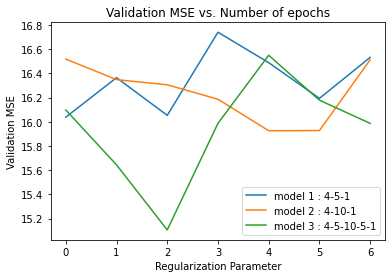

In [ ]:
plt.title("Validation MSE vs. Number of epochs")
plt.plot(mse_alpha1, label = 'model 1 : 4-5-1')
plt.plot(mse_alpha2, label = 'model 2 : 4-10-1')
plt.plot(mse_alpha3, label = 'model 3 : 4-5-10-5-1')
plt.xlabel("Regularization Parameter on log scale")
plt.ylabel("Validation MSE")
plt.legend()
plt.show()

In [ ]:
print("Optimal regularisation parameter for model 1:", alpha[np.argmin(mse_alpha1)])
print("Optimal regularisation parameter for model 2:", alpha[np.argmin(mse_alpha2)])
print("Optimal regularisation parameter for model 3:", alpha[np.argmin(mse_alpha3)])

Optimal regularisation parameter for model 1: 1e-06
Optimal regularisation parameter for model 2: 0.01
Optimal regularisation parameter for model 3: 0.0001


Ideally, MSE decreases with increasing value of regularisation parameter upto a certain optimal value. But this pattern is clear when we have a sufficiently large dataset for the model to overfit where regularisation meaningfully comes into picture. Though the results here are not completely deterministic, taking the optimal regularisation parameter for each of the three models we further check which model performs the best in terms of MSE.

In [17]:
# initialize kfold
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True)

# set range of alpha
alpha = [alpha[np.argmin(mse_alpha1)]]

# store mse for each fold
mse_alpha1 = []

# run loop over all alphas
for a in alpha:

  mse_per_fold1 = []

  X = np.concatenate((x_train, x_valid), axis=0)
  y = np.concatenate((y_train, y_valid), axis=0)

  fold_no = 1

  print("Regularizer paramter:", a)
  
  for train, test in kfold.split(X, y):

    reg_model1 = Sequential()
    reg_model1.add(Dense(5, input_dim=4, activation = 'relu', kernel_regularizer=keras.regularizers.l2(a)))
    reg_model1.add(Dense(1))

    reg_model1.compile(loss='mse', optimizer='adam', metrics=['mse'])

    reg_history1 = reg_model1.fit(X[train], y[train], batch_size=10, epochs=300, verbose = 0, validation_data=(X[test], y[test]))
    mse_alpha1.append(reg_history1.history['val_mse'])

    fold_no = fold_no + 1

Regularizer paramter: 1e-06


In [19]:
# initialize kfold
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True)

# set range of alpha
alpha = [alpha[np.argmin(mse_alpha2)]]

# store mse for each fold
mse_alpha2 = []

# run loop over all alphas
for a in alpha:

  X = np.concatenate((x_train, x_valid), axis=0)
  y = np.concatenate((y_train, y_valid), axis=0)

  fold_no = 1

  print("Regularizer paramter:", a)
  
  for train, test in kfold.split(X, y):

    reg_model2 = Sequential()
    reg_model2.add(Dense(10, input_dim=4, activation = 'relu', kernel_regularizer=keras.regularizers.l2(a)))
    reg_model2.add(Dense(1))

    reg_model2.compile(loss='mse', optimizer='adam', metrics=['mse'])

    reg_history2 = reg_model2.fit(X[train], y[train], batch_size=10, epochs=300, verbose = 0, validation_data=(X[test], y[test]))
    mse_alpha2.append(reg_history2.history['val_mse'])

    fold_no = fold_no + 1

Regularizer paramter: 0.01


In [20]:
# initialize kfold
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True)

# set range of alpha
alpha = [alpha[np.argmin(mse_alpha3)]]

# store mse for each fold
mse_alpha3 = []

# run loop over all alphas
for a in alpha:

  X = np.concatenate((x_train, x_valid), axis=0)
  y = np.concatenate((y_train, y_valid), axis=0)

  fold_no = 1

  print("Regularizer paramter:", a)
  
  for train, test in kfold.split(X, y):

    reg_model3 = Sequential()
    reg_model3.add(Dense(5, input_dim=4, activation = 'relu', kernel_regularizer=keras.regularizers.l2(a)))
    reg_model3.add(Dense(10, activation = 'relu', kernel_regularizer=keras.regularizers.l2(a)))
    reg_model3.add(Dense(5, activation = 'relu', kernel_regularizer=keras.regularizers.l2(a)))
    reg_model3.add(Dense(1))

    reg_model3.compile(loss='mse', optimizer='adam', metrics=['mse'])

    reg_history3 = reg_model3.fit(X[train], y[train], batch_size=10, epochs=300, verbose = 0, validation_data=(X[test], y[test]))
    mse_alpha3.append(reg_history3.history['val_mse'])

    fold_no = fold_no + 1

Regularizer paramter: 0.0001


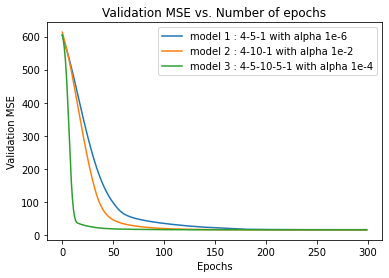

In [21]:
plt.title("Validation MSE vs. Number of epochs")
plt.plot(np.mean(mse_alpha1, axis = 0), label = 'model 1 : 4-5-1 with alpha 1e-6')
plt.plot(np.mean(mse_alpha2, axis = 0), label = 'model 2 : 4-10-1 with alpha 1e-2')
plt.plot(np.mean(mse_alpha3, axis = 0), label = 'model 3 : 4-5-10-5-1 with alpha 1e-4')
plt.xlabel("Epochs")
plt.ylabel("Validation MSE")
plt.legend()
plt.show()

Of all the models with their optimal regularization parameter, the model with with 3 hidden layers of size 5, 10 and 5 performs best i.e. validation MSE converges faster. Having identified the best model, we predict on the test data using it and get lowest mean square error (mse) as follows.

In [22]:
reg_model1.evaluate(x_test, y_test)
reg_model2.evaluate(x_test, y_test)
reg_model3.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 13.6243 - mse: 13.6204


[13.624295234680176, 13.620405197143555]

# **TASK 4 - UNDERFITTING AND OVERFITTING**

In [ ]:
# underfit model 

# initialize kfold 
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True)

# store train and validation MSE for all epochs in each fold
un_val_mse1 = []
un_train_mse1 = []

# prepare data
X = np.concatenate((x_train, x_valid), axis=0)
y = np.concatenate((y_train, y_valid), axis=0)

# start with first fold
fold_no = 1

for train, test in kfold.split(X, y):

  # Define the model
  un_model1 = Sequential()
  un_model1.add(Dense(2, input_dim=4, activation = 'relu'))
  un_model1.add(Dense(1))

  # Compile the model
  un_model1.compile(loss='mse', optimizer='adam', metrics=['mse'])

  # Track fold
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  un_history1 = un_model1.fit(X[train], y[train], batch_size=10, epochs=500, verbose = 0, validation_data=(X[test], y[test]))
  un_train_mse1.append(un_history1.history['mse'])
  un_val_mse1.append(un_history1.history['val_mse'])

  # Increment fold
  fold_no = fold_no + 1

Training for fold 1 ...
Training for fold 2 ...
Training for fold 3 ...
Training for fold 4 ...
Training for fold 5 ...
Training for fold 6 ...
Training for fold 7 ...
Training for fold 8 ...
Training for fold 9 ...
Training for fold 10 ...


In [ ]:
# overfit model

# initialize kfold 
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True)

# store train and validation MSE for all epochs in each fold
ov_val_mse1 = []
ov_train_mse1 = []

# prepare data
X = np.concatenate((x_train, x_valid), axis=0)
y = np.concatenate((y_train, y_valid), axis=0)

# start with first fold
fold_no = 1

for train, test in kfold.split(X, y):

  # Define the model 
  ov_model1 = Sequential()
  ov_model1.add(Dense(50, input_dim=4, activation = 'relu'))
  ov_model1.add(Dense(50, activation = 'relu'))
  ov_model1.add(Dense(100, activation = 'relu'))
  ov_model1.add(Dense(100, activation = 'relu'))
  ov_model1.add(Dense(50, activation = 'relu'))
  ov_model1.add(Dense(50, activation = 'relu'))
  ov_model1.add(Dense(1))

  # Compile the model
  ov_model1.compile(loss='mse', optimizer='adam', metrics=['mse'])

  # Track fold
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  ov_history1 = ov_model1.fit(X[train], y[train], batch_size=10, epochs=500, verbose = 0, validation_data=(X[test], y[test]))
  ov_train_mse1.append(ov_history1.history['mse'])
  ov_val_mse1.append(ov_history1.history['val_mse'])

  # Increment fold
  fold_no = fold_no + 1

Training for fold 1 ...
Training for fold 2 ...
Training for fold 3 ...
Training for fold 4 ...
Training for fold 5 ...
Training for fold 6 ...
Training for fold 7 ...
Training for fold 8 ...
Training for fold 9 ...
Training for fold 10 ...


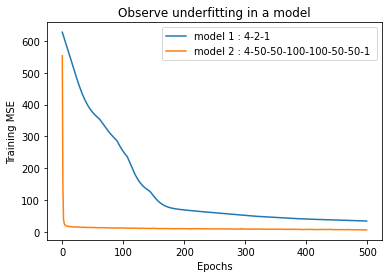

In [ ]:
plt.title("Observe underfitting in a model")
plt.plot(np.mean(un_train_mse1, axis = 0), label = "model 1 : 4-2-1")
plt.plot(np.mean(ov_train_mse1, axis = 0), label = "model 2 : 4-50-50-100-100-50-50-1 ")
plt.xlabel("Epochs")
plt.ylabel("Training MSE")
plt.legend()
plt.show()

The graph above shows that model 1 gives high training MSE even after large number of epochs, while model 2 quickly converges. This shows that the model is underfit and is unable to learn a lot from training data. This situation was purposefully arrived at by keeping just one hidden layer in the network of a very small size. This means the model will have very less number of weights and biases to adjust in order to capyture and learn the patterns in the data. This is what underfitting essentially means.

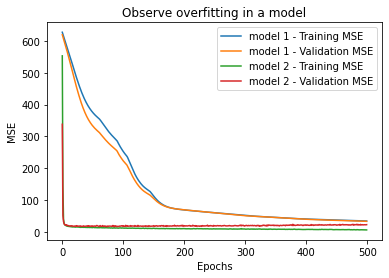

In [ ]:
plt.title("Observe overfitting in a model")
plt.plot(np.mean(un_train_mse1, axis = 0), label = "model 1 - Training MSE")
plt.plot(np.mean(un_val_mse1, axis = 0), label = "model 1 - Validation MSE")
plt.plot(np.mean(ov_train_mse1, axis = 0), label = "model 2 - Training MSE")
plt.plot(np.mean(ov_val_mse1, axis = 0), label = "model 2 - Validation MSE")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()

The graph above shows that for model 1, both training and validation MSE decreases simultaneously, but for model 2 initially both training and validation MSE decreases, but as epochs increase beyond a limit, the validation MSE increases. This shows that the model is learning too much from the training data which leads to decreasing training MSE, but is unable to generalize to unseen data now so validation MSE goes on increasing. (This trend would have been on a large datset.) This is a purposefully reached situation by making a very deep neural network with large number of nodes that allows it to learn lots of weights and biases and train itself to identify all the patterns in train data. But it specialises so much on train data that it cannot generalize on unseen data and this precisely what overfitting means.

# **POINTS TO NOTE**

**Comparision of MSE** <br>
In all the 3 tasks, model with 3 hidden layers of size 5, 10 and 5 peforms best in terms of minimum MSE. For task 1, we are not using any validation so we get an MSE of 14.9765. For task 2 we use cross validation which reduces bias of the model, hence MSE improves a bit to 14.1578. For task 3 we use regularisation along with validation which reduces any kind of overfitting in the model, so MSE further reduces to 13.6204. Thus with every added improvements in the model, the MSE decreases.

**Benefits of cross validation** <br>
To reduce variability we perform multiple folds of cross-validation with different subsets of the data as validation data. We combine the validation results from these multiple rounds to come up with an estimate of the model’s predictive performance. Cross-validation will give us a more accurate estimate of a model’s performance by reducing bias. So it gives a very accurate representation of the model's predictive behaviour as can be seen from models above as well. The models with least validation MSE performed best on test data as well. 